# What budget ranges are associated with profitable movies, and how does budget relate to revenue? 
- metric-budget ranges (take top 10 movies,gross proceed - production cost to create a range)
- data source-box mojo

In [1]:
# Import the required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr

 # Dataset 1 ; box mojo (BOM)

In [2]:
# Load the 1st dataset
# Replace the file path with your specific file location
dataset1 = 'bom.movie_gross.csv'
bom = pd.read_csv(dataset1)
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# Inspect the top 10 data
bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [4]:
# Check the info of the data
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
# Check the statistical summmary
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [6]:
# Incude the object columns
bom.describe(include="O")

,title,studio,foreign_gross
count,3387,3382,2037
unique,3386,257,1204
top,Bluebeard,IFC,1200000
freq,2,166,23


In [7]:
# Check missing values
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
# Step 4: Handle Missing Values
# Fill missing domestic and foreign gross values with 0
bom['domestic_gross'] = bom['domestic_gross'].fillna(0)
bom['foreign_gross'] = bom['foreign_gross'].replace('[^\d.]', '', regex=True).astype(float).fillna(0)


In [9]:
# Check missing values
bom.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [10]:
# Add a Total Gross Column
bom['worldwide_gross'] = bom['domestic_gross'] + bom['foreign_gross']

# Dataset 2 : TN

In [11]:
# Load the dataset
# Replace the file path with your preffered location
dataset2 = 'tn.movie_budgets.csv'
tn = pd.read_csv(dataset2)
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [12]:
# Inspect the top 10 data
tn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [13]:
# Check the info of the data
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
# Statistical summary
tn.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [15]:
# Incude the object columns
tn.describe(include='O')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [16]:
# check missing value
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [17]:
tn = tn.rename(columns={'movie':'title'})
tn.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Merge the two dataset

In [18]:
df=pd.merge(tn,bom, how='left', on='title')
df

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross_x,studio,domestic_gross_y,foreign_gross,year,worldwide_gross_y
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000.0,2011.0,1.045700e+09
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000.0,2015.0,1.405400e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,NaN,NaN,NaN,NaN,NaN
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,NaN,NaN,NaN,NaN,NaN


In [19]:
df.isna().sum()

id                      0
release_date            0
title                   0
production_budget       0
domestic_gross_x        0
worldwide_gross_x       0
studio               4536
domestic_gross_y     4535
foreign_gross        4535
year                 4535
worldwide_gross_y    4535
dtype: int64

In [20]:
# Check the percentage of the missing value
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage)

id                    0.000000
release_date          0.000000
title                 0.000000
production_budget     0.000000
domestic_gross_x      0.000000
worldwide_gross_x     0.000000
studio               78.450363
domestic_gross_y     78.433068
foreign_gross        78.433068
year                 78.433068
worldwide_gross_y    78.433068
dtype: float64


In [21]:
df = df.drop(columns=['studio', 'domestic_gross_y', 'foreign_gross','worldwide_gross_y'])


In [22]:
# Fill missing years from release_date
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Drop rows where year is still missing
df = df.dropna(subset=['year'])
df

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross_x,year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,2018
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,2015


In [23]:
# Renmae columns for clarity
df = df.rename(columns={
    'domestic_gross_x': 'domestic_gross',
    'worldwide_gross_x': 'global_gross',
    'production_budget': 'budget'
})


In [24]:
df.isna().sum()

id                0
release_date      0
title             0
budget            0
domestic_gross    0
global_gross      0
year              0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5782 non-null   int64         
 1   release_date    5782 non-null   datetime64[ns]
 2   title           5782 non-null   object        
 3   budget          5782 non-null   object        
 4   domestic_gross  5782 non-null   object        
 5   global_gross    5782 non-null   object        
 6   year            5782 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 293.7+ KB


In [26]:
# Remove commas or dollar signs and convert to float
df['budget'] = df['budget'].str.replace(',', '').str.replace('$', '').astype(float)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
df['global_gross'] = df['global_gross'].str.replace(',', '').str.replace('$', '').astype(float)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5782 non-null   int64         
 1   release_date    5782 non-null   datetime64[ns]
 2   title           5782 non-null   object        
 3   budget          5782 non-null   float64       
 4   domestic_gross  5782 non-null   float64       
 5   global_gross    5782 non-null   float64       
 6   year            5782 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(1)
memory usage: 293.7+ KB


## Check for outliers

<Axes: >

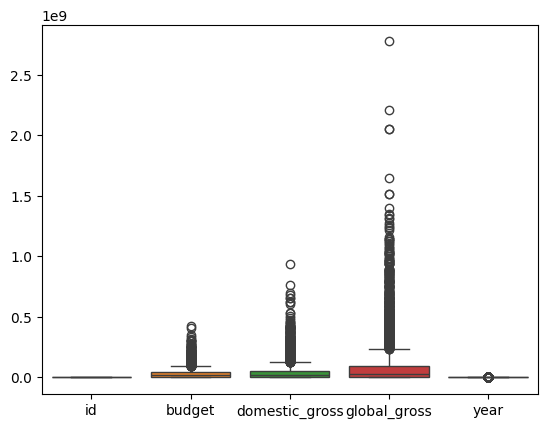

In [28]:
#checking for outlier #use boxplot to check cr column
sns.boxplot(df)

# Database 3 :imdb

In [29]:
# Connect to the database
conn = sqlite3.connect("im.db")

In [30]:
# Getting the database names
pd.read_sql("""SELECT name
                FROM sqlite_master
                WHERE type='table';
                """,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [31]:
# Read the movie basic table
basic = pd.read_sql("""SELECT *
                FROM movie_basics;
                """,conn)
basic

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [32]:
# Read the movie akas table
akas = pd.read_sql("""SELECT *
                FROM movie_akas;
                """,conn)
akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [33]:
# Merge the tables
merged_table = pd.merge(basic, akas, how='left', on="movie_id")
merged_table

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",2.0,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4.0,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",5.0,Sungharsh,IN,hi,None,alternative spelling,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355540,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355541,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355542,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355543,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
merged_table.isna().sum()

movie_id                  0
primary_title             0
original_title           32
start_year                0
runtime_minutes       41326
genres                 6663
ordering              23842
title                 23842
region                77135
language             313830
types                187098
attributes           340620
is_original_title     23867
dtype: int64

In [35]:
# Select the wanted columns
db = merged_table[['movie_id', 'genres','title']]
db

,movie_id,genres,title
0,tt0063540,"Action,Crime,Drama",Sangharsh
1,tt0063540,"Action,Crime,Drama",Sunghursh
2,tt0063540,"Action,Crime,Drama",Sunghursh
3,tt0063540,"Action,Crime,Drama",Sunghursh
4,tt0063540,"Action,Crime,Drama",Sungharsh
...,...,...,...
355540,tt9916538,Drama,NaN
355541,tt9916622,Documentary,NaN
355542,tt9916706,Comedy,NaN
355543,tt9916730,None,NaN


In [36]:
db.isna().sum()

movie_id        0
genres       6663
title       23842
dtype: int64

In [37]:
# Drop null values
db = db.dropna()
db.isna().sum()

movie_id    0
genres      0
title       0
dtype: int64

# combine df and db

In [38]:
combined = pd.merge(df, db, how="inner", on="title")
combined

,id,release_date,title,budget,domestic_gross,global_gross,year,movie_id,genres
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,tt1775309,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,tt1298650,"Action,Adventure,Fantasy"
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,tt1298650,"Action,Adventure,Fantasy"
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,tt1298650,"Action,Adventure,Fantasy"
4,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,tt6565702,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
10564,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,2001,tt2027234,Thriller
10565,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,2012,tt1880418,"Comedy,Drama"
10566,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,2012,tt1880418,"Comedy,Drama"
10567,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,tt7837402,"Horror,Sci-Fi,Thriller"


## Save the new dataset to csv

In [39]:
combined.to_csv("new_movie.csv")

# EDA

In [40]:
# Load the dataset
file="new_movie.csv"
data = pd.read_csv(file)
data

,Unnamed: 0,id,release_date,title,budget,domestic_gross,global_gross,year,movie_id,genres
0,0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,tt1775309,Horror
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,tt1298650,"Action,Adventure,Fantasy"
2,2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,tt1298650,"Action,Adventure,Fantasy"
3,3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,tt1298650,"Action,Adventure,Fantasy"
4,4,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,tt6565702,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
10564,10564,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,2001,tt2027234,Thriller
10565,10565,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,2012,tt1880418,"Comedy,Drama"
10566,10566,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,2012,tt1880418,"Comedy,Drama"
10567,10567,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,tt7837402,"Horror,Sci-Fi,Thriller"


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10569 entries, 0 to 10568
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10569 non-null  int64  
 1   id              10569 non-null  int64  
 2   release_date    10569 non-null  object 
 3   title           10569 non-null  object 
 4   budget          10569 non-null  float64
 5   domestic_gross  10569 non-null  float64
 6   global_gross    10569 non-null  float64
 7   year            10569 non-null  int64  
 8   movie_id        10569 non-null  object 
 9   genres          10569 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 825.8+ KB


In [42]:
data['profitable_ratio'] = data['global_gross']/data['budget']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10569 entries, 0 to 10568
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10569 non-null  int64  
 1   id                10569 non-null  int64  
 2   release_date      10569 non-null  object 
 3   title             10569 non-null  object 
 4   budget            10569 non-null  float64
 5   domestic_gross    10569 non-null  float64
 6   global_gross      10569 non-null  float64
 7   year              10569 non-null  int64  
 8   movie_id          10569 non-null  object 
 9   genres            10569 non-null  object 
 10  profitable_ratio  10569 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 908.4+ KB


## Univariate Analysis

             budget  global_gross  profitable_ratio
count  1.056900e+04  1.056900e+04      10569.000000
mean   4.463696e+07  1.476863e+08          4.578851
std    5.582737e+07  2.504921e+08         14.287541
min    1.400000e+03  0.000000e+00          0.000000
25%    7.000000e+06  7.034615e+06          0.666331
50%    2.300000e+07  4.857596e+07          2.125160
75%    5.800000e+07  1.630189e+08          4.188454
max    4.250000e+08  2.776345e+09        416.564740


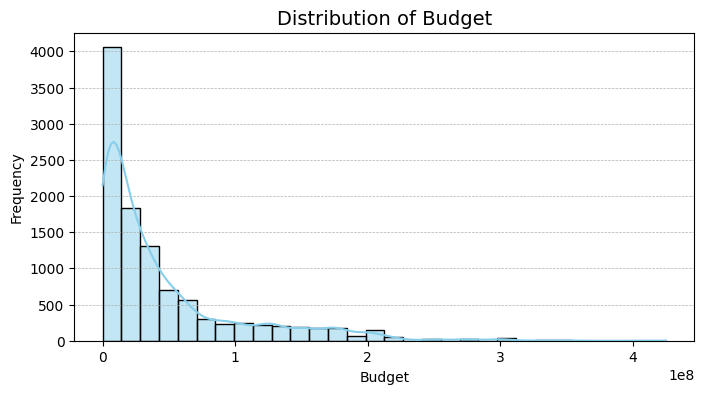

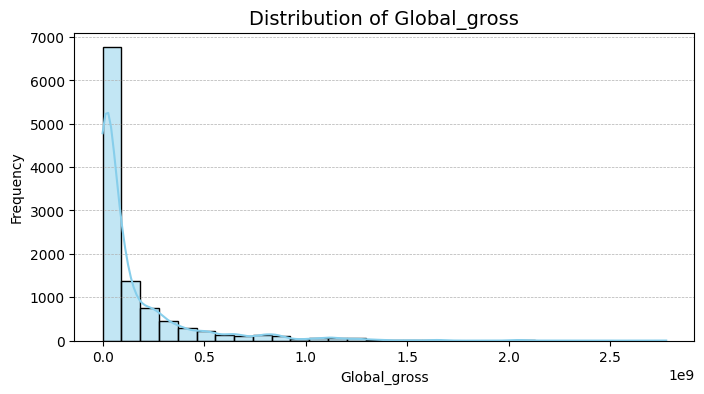

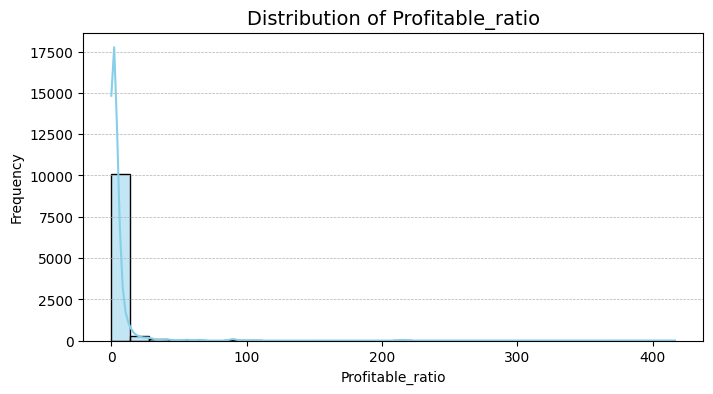

In [43]:
# Summary statistics for numerical columns
numerical_cols = ['budget', 'global_gross', 'profitable_ratio']
print(data[numerical_cols].describe())
# Histograms for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()

- Visualize the distribution of continuous variables like budget, global_gross, and profitability_ratio.
- sns.histplot() adds a kernel density estimate (KDE) to show the distribution's shape

## Bivariate Analysis

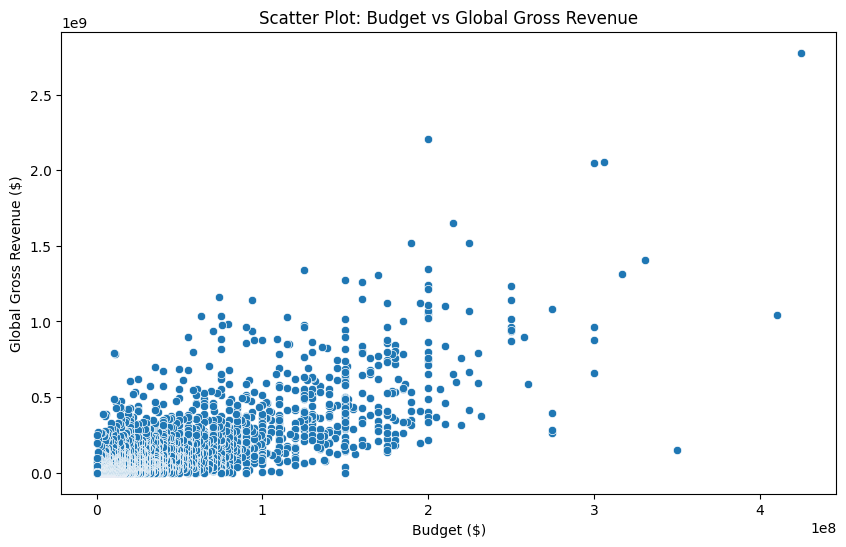

In [44]:
# Scatter Plot of Budget vs Global Gross (Total Revenue)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='global_gross')
plt.title('Scatter Plot: Budget vs Global Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Global Gross Revenue ($)')
plt.show()


- Visualizes the relationship between budget and global_gross (total revenue). - This helps to see if there’s an overall trend where higher budgets lead to higher revenues.

In [45]:
# Pearson Correlation Coefficient between Budget and Global Gross
corr, _ = pearsonr(df['budget'], df['global_gross'])
print(f'Pearson Correlation Coefficient (Budget vs Global Gross): {corr:.2f}')


Pearson Correlation Coefficient (Budget vs Global Gross): 0.75


- Calculates the linear correlation between budget and global_gross, helping to quantify how closely related these two variables are.



## Multivariate Analysis

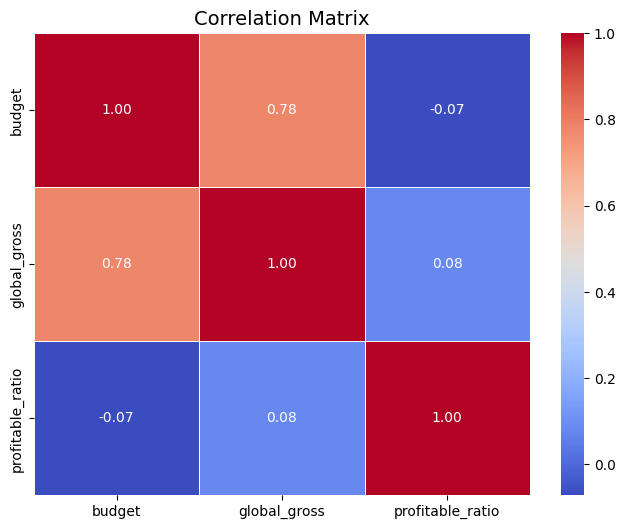

In [46]:
#  Correlation Matrix
# Compute the correlation matrix for numerical columns
correlation_matrix = data[['budget', 'global_gross', 'profitable_ratio']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

- Visualizes the pairwise correlations between numerical variables (budget, global_gross, profitability_ratio) using a heatmap.
- Correlation values will help us see how these variables interact with each other. For example, do higher budgets correlate with higher global gross revenues?
- Do budget and global gross have a strong positive correlation? How does profitability relate to these variables?


## Insights Expected
- Profitability by Budget: Higher budget movies tend to have a higher chance of being profitable, but profitability could be more concentrated in the lower budget ranges due to smaller production costs.
